# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
        
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ustka
Processing Record 2 of Set 1 | richards bay
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kananga
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | bulayevo
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | xining
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | rukban
City not found. Skipping...
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | keelung
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | namibe
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | adam

Processing Record 40 of Set 4 | demba
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | kalmunai
Processing Record 43 of Set 4 | jasper
Processing Record 44 of Set 4 | mo i rana
Processing Record 45 of Set 4 | davos
Processing Record 46 of Set 4 | moss vale
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | baise city
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | kashiwazaki
Processing Record 1 of Set 5 | farasan
Processing Record 2 of Set 5 | abu al matamir
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | narvik
Processing Record 5 of Set 5 | palera
Processing Record 6 of Set 5 | port douglas
Processing Record 7 of Set 5 | hihifo
City not found. Skipping...
Processing Record 8 of Set 5 | uyuni
Processing Record 9 of Set 5 | tashtagol
Processing Record 10 of Set 5 | umba
Processing Record 11 of Set 5 | inhambane
Processing Record 12 of Set 5 | severo-yeniseyskiy
Processing Record 13 of 

Processing Record 30 of Set 8 | rongelap
Processing Record 31 of Set 8 | perieni
Processing Record 32 of Set 8 | kangding
Processing Record 33 of Set 8 | migori
Processing Record 34 of Set 8 | muang phonsavan
Processing Record 35 of Set 8 | fort mcmurray
Processing Record 36 of Set 8 | saudarkrokur
Processing Record 37 of Set 8 | weno
Processing Record 38 of Set 8 | langepas
Processing Record 39 of Set 8 | san antonio de pale
Processing Record 40 of Set 8 | altay
Processing Record 41 of Set 8 | gaigeturi
Processing Record 42 of Set 8 | aswan
Processing Record 43 of Set 8 | quepem
Processing Record 44 of Set 8 | mariental
Processing Record 45 of Set 8 | gadzhiyevo
Processing Record 46 of Set 8 | nova vicosa
Processing Record 47 of Set 8 | mayrtup
Processing Record 48 of Set 8 | langxiang
Processing Record 49 of Set 8 | kurduvadi
Processing Record 0 of Set 9 | sarmiento
Processing Record 1 of Set 9 | ijuw
City not found. Skipping...
Processing Record 2 of Set 9 | saint john
Processing Re

Processing Record 21 of Set 12 | grand-lahou
Processing Record 22 of Set 12 | xinyuan
Processing Record 23 of Set 12 | san fernando
Processing Record 24 of Set 12 | laojunmiao
Processing Record 25 of Set 12 | aydarken
Processing Record 26 of Set 12 | jaicos
Processing Record 27 of Set 12 | port alberni
Processing Record 28 of Set 12 | pulandian
Processing Record 29 of Set 12 | ocean shores
Processing Record 30 of Set 12 | tyuratam
Processing Record 31 of Set 12 | ratne
Processing Record 32 of Set 12 | nuku'alofa
Processing Record 33 of Set 12 | capitan bado
Processing Record 34 of Set 12 | ghat
Processing Record 35 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 36 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 37 of Set 12 | chorozinho
Processing Record 38 of Set 12 | coxcatlan
Processing Record 39 of Set 12 | chiat'ura
City not found. Skipping...
Processing Record 40 of Set 12 | formosa
Processing Record 41 of Set 12 | santiago
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ustka,54.5805,16.8619,15.92,70,100,11.82,PL,1697259796
1,richards bay,-28.7830,32.0377,20.53,64,21,7.08,ZA,1697259797
2,albany,42.6001,-73.9662,8.23,87,99,0.45,US,1697259797
3,kananga,-5.8958,22.4178,21.59,95,100,1.46,CD,1697259798
4,yellowknife,62.4560,-114.3525,11.98,82,0,7.15,CA,1697259798


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ustka,54.5805,16.8619,15.92,70,100,11.82,PL,1697259796
1,richards bay,-28.7830,32.0377,20.53,64,21,7.08,ZA,1697259797
2,albany,42.6001,-73.9662,8.23,87,99,0.45,US,1697259797
3,kananga,-5.8958,22.4178,21.59,95,100,1.46,CD,1697259798
4,yellowknife,62.4560,-114.3525,11.98,82,0,7.15,CA,1697259798


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

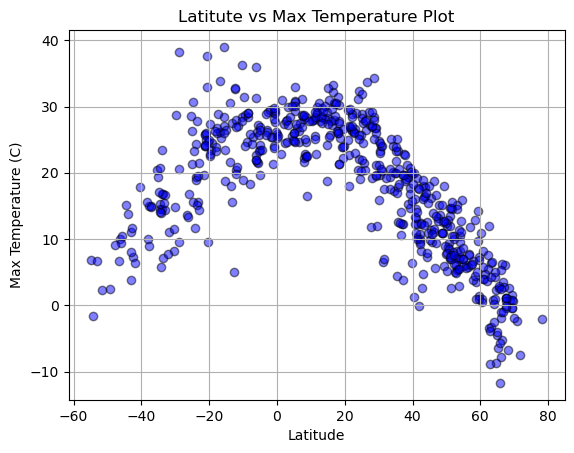

In [9]:
# Build scatter plot for latitude vs. temperature
lat_scat = city_data_df.loc[:,"Lat"]
temp_scat = city_data_df.loc[:, "Max Temp"]
plt.scatter(lat_scat, temp_scat, marker="o", facecolors="blue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("Latitute vs Max Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

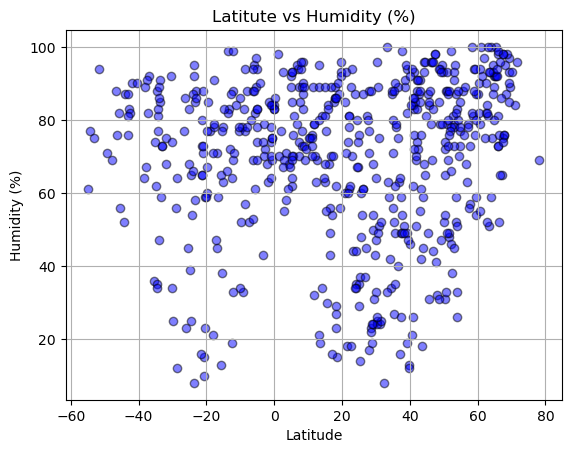

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity_scat = city_data_df.loc[:, "Humidity"]
plt.scatter(lat_scat, humidity_scat, marker="o", facecolors="blue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("Latitute vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

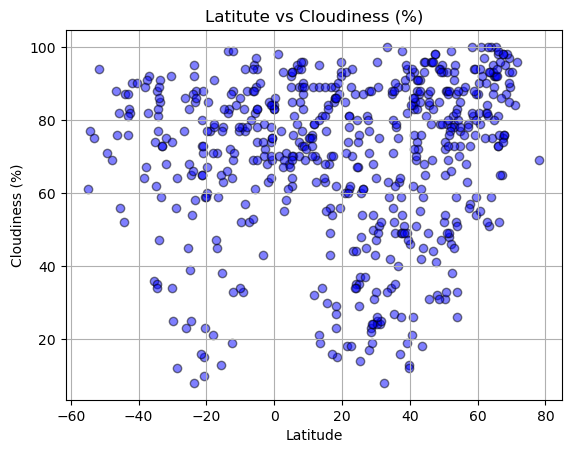

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_scat = city_data_df.loc[:, "Cloudiness"]
plt.scatter(lat_scat, humidity_scat, marker="o", facecolors="blue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("Latitute vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

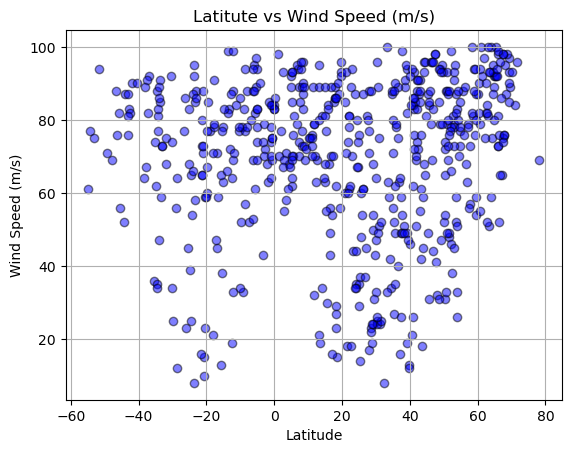

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed_scat = city_data_df.loc[:, "Wind Speed"]
plt.scatter(lat_scat, humidity_scat, marker="o", facecolors="blue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("Latitute vs Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat, humidity_scat)
regress_values = lat_scat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# # Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ustka,54.5805,16.8619,15.92,70,100,11.82,PL,1697259796
2,albany,42.6001,-73.9662,8.23,87,99,0.45,US,1697259797
4,yellowknife,62.4560,-114.3525,11.98,82,0,7.15,CA,1697259798
5,bulayevo,54.9056,70.4439,6.99,73,100,7.91,KZ,1697259798
6,olonkinbyen,70.9221,-8.7187,-2.33,84,99,10.54,SJ,1697259799


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,richards bay,-28.7830,32.0377,20.53,64,21,7.08,ZA,1697259797
3,kananga,-5.8958,22.4178,21.59,95,100,1.46,CD,1697259798
7,edinburgh of the seven seas,-37.0676,-12.3116,14.94,92,99,11.63,SH,1697259799
9,port-aux-francais,-49.3500,70.2167,2.50,71,57,6.37,TF,1697259799
11,grytviken,-54.2811,-36.5092,-1.58,77,69,14.25,GS,1697259801


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8931522115147056


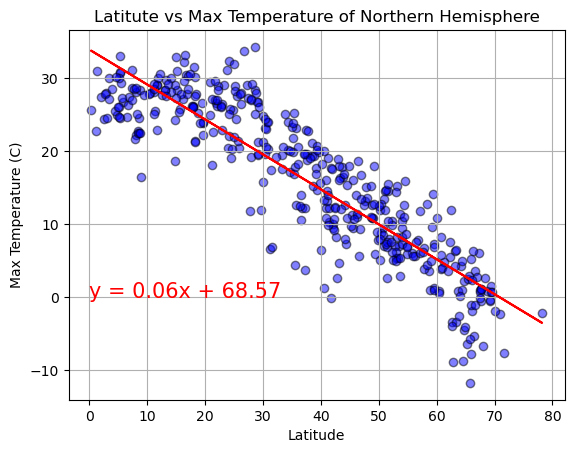

In [16]:
# Linear regression on Northern Hemisphere
lat_scat_north = northern_hemi_df.loc[:,"Lat"]
temp_scat_north = northern_hemi_df.loc[:,"Max Temp"]
plt.scatter(lat_scat_north, temp_scat_north, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_north, temp_scat_north)
regress_values = lat_scat_north * slope + intercept
plt.plot(lat_scat_north,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Max Temperature of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

The rvalue is: 0.7260820381193517


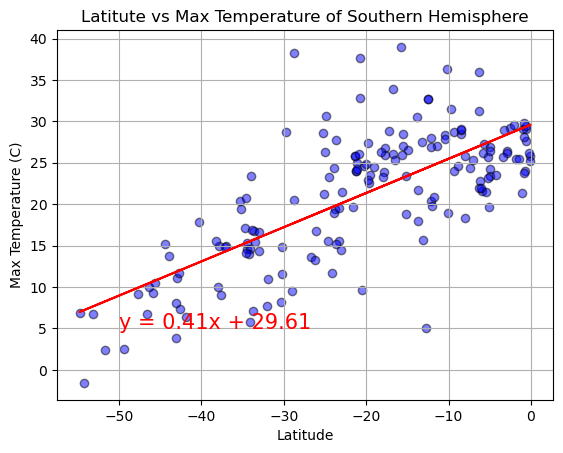

In [17]:
# Linear regression on Southern Hemisphere
lat_scat_south = southern_hemi_df.loc[:,"Lat"]
temp_scat_south = southern_hemi_df.loc[:,"Max Temp"]
plt.scatter(lat_scat_south, temp_scat_south, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_south, temp_scat_south)
regress_values = lat_scat_south * slope + intercept
plt.plot(lat_scat_south,regress_values,"r-")
line_eq_2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_2,(-50,5),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Max Temperature of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

**Discussion about the linear relationship:** The max temperature increases as the latitude gets closer to equator (0) at a rate of roughly 0.44 degrees C per degree of latitude in the Southern Hemisphere. Vice versia, the max temperature increases at a rate of roughly 0.48 degrees C per degree of latitude in the Northern Hemisphere. For this data set, it appears the correlation between latitude and max temperature is stronger in the Northern Hemisphere, however, both rvalues prove strong correlation between the two variables. 

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.18433713194094817


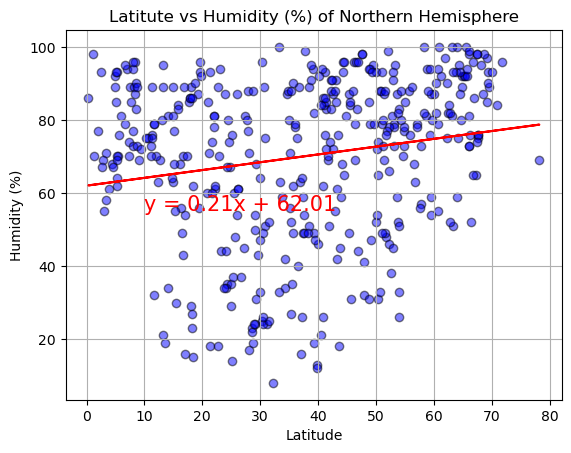

In [18]:
# Northern Hemisphere
humidity_scat_north = northern_hemi_df.loc[:,"Humidity"]
plt.scatter(lat_scat_north, humidity_scat_north, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_north, humidity_scat_north)
regress_values = lat_scat_north * slope + intercept
plt.plot(lat_scat_north,regress_values,"r-")
line_eq_3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_3,(10,55),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Humidity (%) of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

The rvalue is: 0.033442891022605545


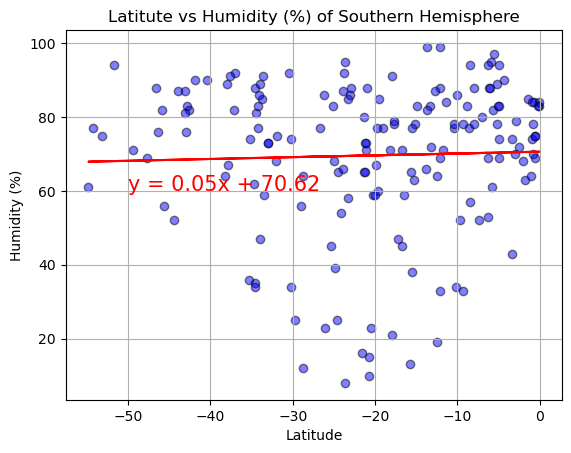

In [19]:
# Southern Hemisphere
humidity_scat_south = southern_hemi_df.loc[:,"Humidity"]
plt.scatter(lat_scat_south, humidity_scat_south, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_south, humidity_scat_south)
regress_values = lat_scat_south * slope + intercept
plt.plot(lat_scat_south,regress_values,"r-")
line_eq_4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_4,(-50,60),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Humidity (%) of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

**Discussion about the linear relationship:** Both lines appear to be almost horizontal (slopes close to 0). Also the rvalues are extremely low in both scatter plots suggesting that there is an extremely low correlation (if one at all) between humidity percentage and latitude. Without looking at the data, this would make logical sense as humidity would be thought to be more affected by type of ecosystem of an area rather than it's latitude coordinate. 

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.23282690970117925


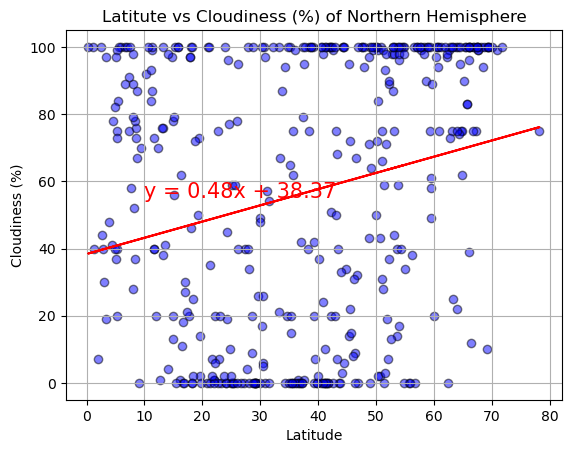

In [20]:
# Northern Hemisphere
cloudiness_scat_north = northern_hemi_df.loc[:,"Cloudiness"]
plt.scatter(lat_scat_north, cloudiness_scat_north, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_north, cloudiness_scat_north)
regress_values = lat_scat_north * slope + intercept
plt.plot(lat_scat_north,regress_values,"r-")
line_eq_5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_5,(10,55),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Cloudiness (%) of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

The rvalue is: -0.021255968690825876


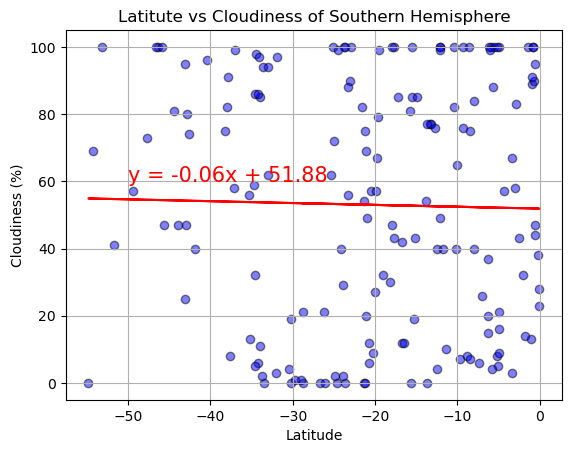

In [21]:
# Southern Hemisphere
cloudiness_scat_south = southern_hemi_df.loc[:,"Cloudiness"]
plt.scatter(lat_scat_south, cloudiness_scat_south, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_south, cloudiness_scat_south)
regress_values = lat_scat_south * slope + intercept
plt.plot(lat_scat_south,regress_values,"r-")
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_6,(-50,60),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Cloudiness of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

**Discussion about the linear relationship:** Comparing both graphs, it appears latitude and cloudiness has a stronger correlation in the northern hemisphere compared to the southern hemisphere. However, both have a relatively low correlation therefore it shouldn't be assumed that a determining factor for the percentage of cloudiness is a location's latitude coordinate. 

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.29701830241444765


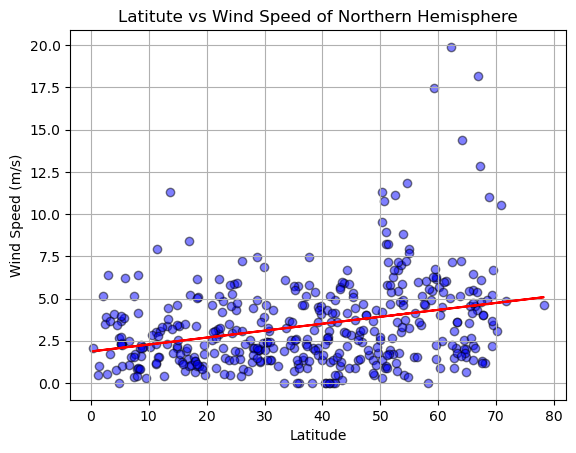

In [22]:
# Northern Hemisphere
wind_speed_north = northern_hemi_df.loc[:,"Wind Speed"]
plt.scatter(lat_scat_north, wind_speed_north, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_north, wind_speed_north)
regress_values = lat_scat_north * slope + intercept
plt.plot(lat_scat_north,regress_values,"r-")
line_eq_7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_7,(10,55),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Wind Speed of Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

The rvalue is: -0.2768497569361202


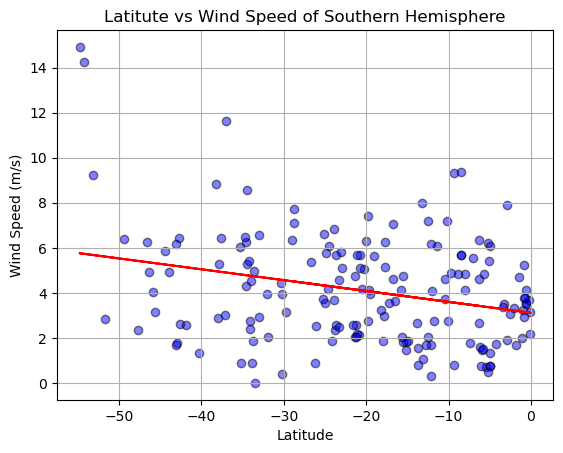

In [23]:
# Southern Hemisphere
wind_speed_south = southern_hemi_df.loc[:,"Wind Speed"]
plt.scatter(lat_scat_south, wind_speed_south, marker="o", facecolors="blue", edgecolors="black", alpha=.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_scat_south, wind_speed_south)
regress_values = lat_scat_south * slope + intercept
plt.plot(lat_scat_south,regress_values,"r-")
line_eq_7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq_7,(10,55),fontsize=15,color="red")
print(f"The rvalue is: {rvalue}")

plt.title("Latitute vs Wind Speed of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

**Discussion about the linear relationship:** Comparing both graphs, it appears latitude and wind speed has a stronger correlation in the northern hemisphere compared to the southern hemisphere. Although there appears to be a slight correlation between latitude coordinate and windspeed in the northern hemisphere, both still have a relatively low correlation therefore it shouldn't be assumed that a determining factor for the wind speed is a location's latitude coordinate. One interesting point about both scatter plots however is that the greatest wind speeds tend to be recorded at locations further from the equator (degree 0). 